In this Notebook, We're going to study curing patients in four sections using a dataset that we've created.

# S1: Create a synthetic data set using choice function

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme()
sns.set_style('white')

In [2]:
def num_random_generator(a):
    np.random.seed(0)
    random = np.random.choice(a, size=100)
    np.random.shuffle(random)
    return random

Age = num_random_generator(np.arange(20, 61))
Sex = num_random_generator([0, 1])
Height = num_random_generator(np.arange(150, 201))
Weight = num_random_generator(np.arange(50, 131))
Smoker = num_random_generator([0, 1])
Patient = num_random_generator([0, 1])

df = pd.DataFrame({"Age": Age,
                  "Sex": Sex, # Male -> 0 , Femle -> 1
                  "Height": Height,
                  "Weight" : Weight,
                  "Smoker" : Smoker,
                  "Cure" : Patient})

df['Smoker'] = np.random.choice([1, 0], size=100)
df['Sex'] = np.random.choice([1, 0], size=100)
df

,Age,Sex,Height,Weight,Smoker,Cure
0,58,0,162,59,1,1
1,24,0,159,50,0,1
2,39,1,166,53,0,0
3,37,0,154,108,0,1
4,25,1,156,70,0,1
...,...,...,...,...,...,...
95,43,0,185,97,0,1
96,44,0,164,91,1,0
97,20,1,189,84,1,1
98,26,0,173,108,1,1


<br> </br>
the number of patinets who were cured.

In [3]:
len(df[df['Cure'] == 1])

56

# S2 : Visulizations

In [4]:
df.describe()

,Age,Sex,Height,Weight,Smoker,Cure
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,39.160000,0.460000,172.530000,91.230000,0.400000,0.560000
std,12.890933,0.500908,14.813627,23.993204,0.492366,0.498888
min,20.000000,0.000000,150.000000,50.000000,0.000000,0.000000
25%,28.750000,0.000000,161.000000,70.750000,0.000000,0.000000
50%,38.500000,0.000000,170.500000,91.500000,0.000000,1.000000
75%,51.250000,1.000000,186.000000,114.000000,1.000000,1.000000
max,60.000000,1.000000,200.000000,130.000000,1.000000,1.000000


<IPython.core.display.Javascript object>


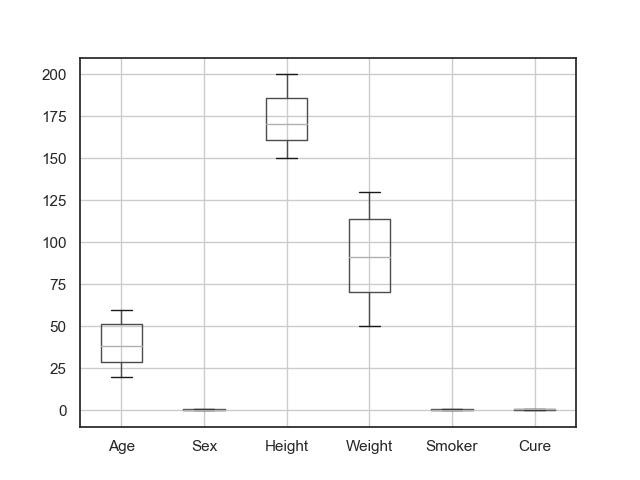

<AxesSubplot: >

In [5]:
df.boxplot()

<IPython.core.display.Javascript object>


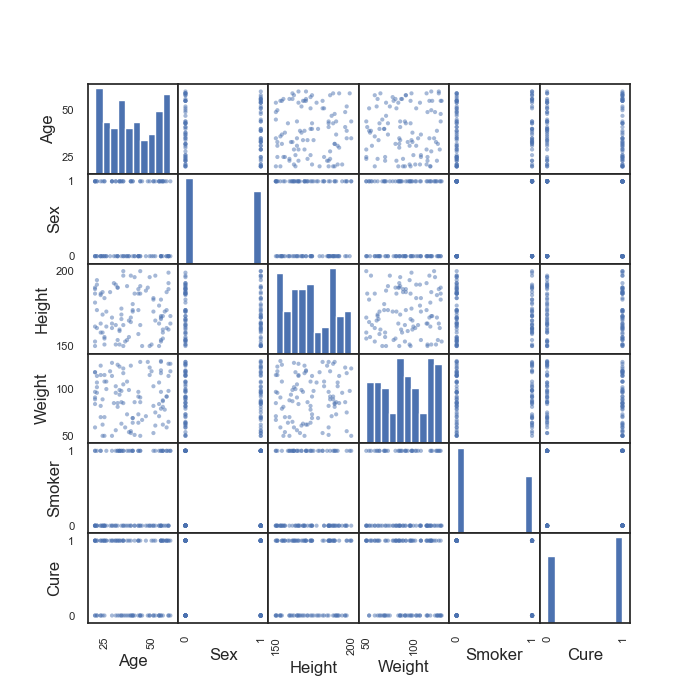

In [6]:
_ = pd.plotting.scatter_matrix(df, figsize=(7, 7), range_padding=0.2)

# S3: Create a predictive model using different algorithms

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

X, y = df.iloc[: , :-1], df.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=75, test_size=25, random_state=0)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)
print("\n----K-Nearest Neighbors (KNN) Classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(knn.score(X_train_scaled, y_train)))
print("R-Squared score (Test): {:.3f}"
      .format(knn.score(X_test_scaled, y_test)))
print("Model Inference:", knn.predict(X_test_scaled))


clf = LogisticRegression(C=5).fit(X_train_scaled, y_train)
print("\n----Logistic Regression----")
print("Model Coeff :\n{}".format(clf.coef_))
print("Model Intercept : {}".format(clf.intercept_))
print("R-Squared score (Training): {:.3f}"
      .format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test): {:.3f}"
      .format(clf.score(X_test_scaled, y_test)))
print("Model Inference:", clf.predict(X_test_scaled))


clf = SVC(kernel='linear', C=.01).fit(X_train_scaled, y_train)
print("\n----Linear Suport Vector Machine (LSVM) classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test): {:.3f}"
      .format(clf.score(X_test_scaled, y_test)))
print("Model Inference:", clf.predict(X_test_scaled))


clf = GaussianNB().fit(X_train_scaled, y_train)
print("\n----Naive Bayes (NB) Classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test): {:.3f}"
      .format(clf.score(X_test_scaled, y_test)))
print("Model Inference:", clf.predict(X_test_scaled))


clf = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train_scaled, y_train)
print("\n----Decision Tree Classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test): {:.3f}"
      .format(clf.score(X_test_scaled, y_test)))
print("Model Inference:", clf.predict(X_test_scaled))


mlp = MLPClassifier(alpha=5, random_state=0).fit(X_train_scaled, y_train)
print("\n----Multi-layer Perceptron (MLP) Classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(mlp.score(X_train_scaled, y_train)))
print("R-Squared score (Test) : {:.3f}"
      .format(mlp.score(X_test_scaled, y_test)))
print("Model Inference:", clf.predict(X_test_scaled))


----K-Nearest Neighbors (KNN) Classifier----
R-Squared score (Training): 0.627
R-Squared score (Test): 0.640
Model Inference: [1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0]

----Logistic Regression----
Model Coeff :
[[-0.54503517 -0.10297077 -0.72326203 -0.69951913 -0.83336808]]
Model Intercept : [1.63532131]
R-Squared score (Training): 0.627
R-Squared score (Test): 0.560
Model Inference: [1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0]

----Linear Suport Vector Machine (LSVM) classifier----
R-Squared score (Training): 0.573
R-Squared score (Test): 0.520
Model Inference: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

----Naive Bayes (NB) Classifier----
R-Squared score (Training): 0.653
R-Squared score (Test): 0.560
Model Inference: [1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0]

----Decision Tree Classifier----
R-Squared score (Training): 0.773
R-Squared score (Test): 0.600
Model Inference: [1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0]

----Multi-layer Percept

As you can see, the Classification model **K-Nearest Neighbors** better fits the data than others, with an R-Squared score of `0.64` on the test set, in this synthetic dataset.

# S4: What are The most important features in the curing of patients?

In [8]:
cure = df[df['Cure'] == 1]
cure.head()

,Age,Sex,Height,Weight,Smoker,Cure
0,58,0,162,59,1,1
1,24,0,159,50,0,1
3,37,0,154,108,0,1
4,25,1,156,70,0,1
5,33,1,161,99,1,1


In [9]:
from scipy.stats import ttest_rel

def correlation(f1, f2='Cure'):
    return ttest_rel(cure[f1], cure[f2])

def get_list_of_pval(*corrs):
    li_corr = [corr[1] for corr in corrs]
    return li_corr

data = get_list_of_pval(correlation("Age"), correlation("Sex"), correlation("Height"),
                 correlation("Weight"), correlation("Smoker"))

data

[2.4704425516702164e-27,
 1.0626691876649116e-11,
 2.3137680677177497e-60,
 1.7731430842945914e-33,
 1.608791900045853e-14]

In [10]:
index = ['Age', 'Sex', 'Height', 'Weight', 'Smoker']
new_df = pd.DataFrame(data=data, index=index, columns=['Corr with Cure'])
new_df = new_df.sort_values('Corr with Cure', axis= 0)
new_df

,Corr with Cure
Height,2.313768e-60
Weight,1.773143e-33
Age,2.470443e-27
Smoker,1.608792e-14
Sex,1.062669e-11


<IPython.core.display.Javascript object>


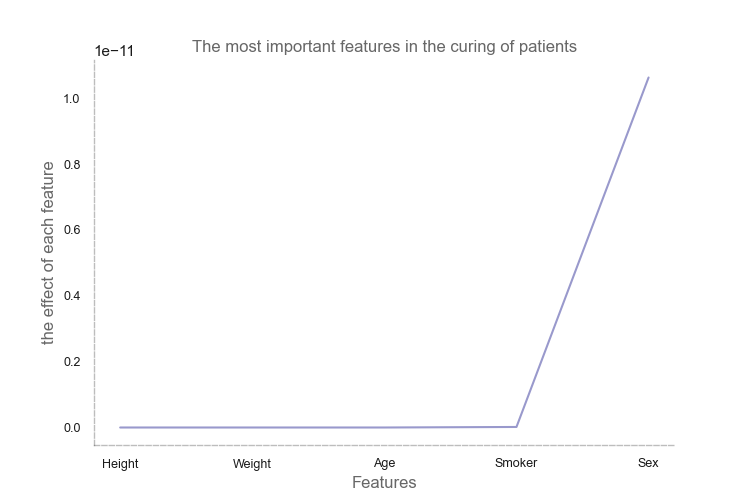

In [11]:
xticklabels = new_df.index

# Create a figure and axis
plt.figure(figsize=(7.5,5))
plt.tight_layout()
ax = plt.gca()

ax.set_title("The most important features in the curing of patients", alpha=.7)
ax.set_ylabel('the effect of each feature', alpha=.7)
ax.set_xlabel('Features', alpha=.7)

ax.tick_params(axis='both', which='both', labelsize=9, labelcolor='k')

# customize the plot frames
for key, value in ax.spines.items():
    if key == 'bottom' or key == 'left':
        value.set_alpha(.3)
        value.set_linestyle('--')
        value.set_linewidth(1)
    else:
        value.set_visible(False)

# change x tick labels
x_loc = range(5)
ax.set_xticks(ticks=x_loc, labels=x_loc)
for i in range(5):
    ax.set_xticklabels(xticklabels)
    
# plot a horizontal barchart
_ = plt.plot(new_df['Corr with Cure'].values, '-', color='Navy', alpha=.4)

As you can see, we have a strong relationship between the feature **Sex and the patients who were cured**. So the most important feature in the curing of patients is Sex and after that Smoker and the others features, Age, Weight, and Height. 